In [7]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
nyse = pd.read_excel(path_data+'listings.xlsx', sheet_name='nyse')

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


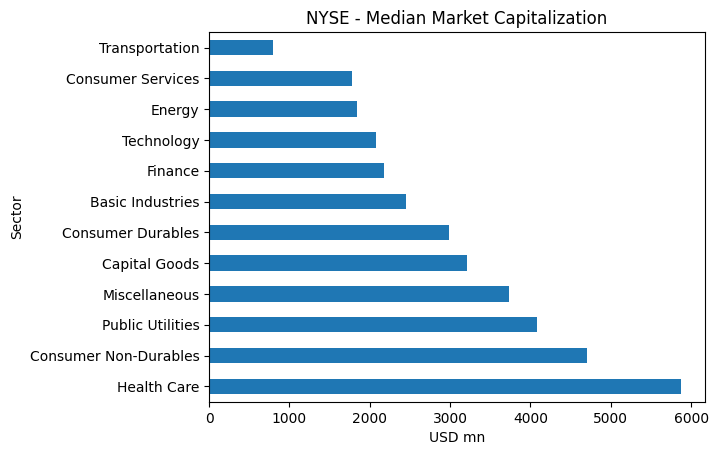

'\nGood job! It seems that companies in the Health Care sector in the NYSE have the highest median market capitalization.\n'

In [9]:
# exercise 01

"""
Median market capitalization by sector

Aggregate data is data combined from several measurements. As you learned in the video, the .groupby() function is helpful in aggregating your data by a specific category.

You have seen previously that the market capitalization data has large outliers. To get a more robust summary of the market value of companies in each sector, you will calculate the median market capitalization by sector. pandas as pd and matplotlib.pyplot as plt have been imported, and the NYSE stock exchange listings are available in your workspace as the DataFrame nyse.
"""

# Instructions

"""

    
    Inspect nyse using .info().
    
    With broadcasting and .div(), create a new column market_cap_m that contains the market capitalization in million USD.
    
    Omit the column 'Market Capitalization' with .drop().
    
    Apply the .groupby() method to nyse, using 'Sector' as the column to group your data by.
    
    Calculate the median of the market_cap_m column as median_mcap_by_sector.
    
    Plot the result as a horizontal bar chart with the title 'NYSE - Median Market Capitalization'. Use plt.xlabel() with 'USD mn' to add a label.
    
    Show the result.

"""

# solution

# Inspect NYSE data
nyse.info()

# Create market_cap_m
nyse['market_cap_m'] = nyse['Market Capitalization'].div(1e6)

# Drop market cap column
nyse = nyse.drop('Market Capitalization', axis=1)

# Group nyse by sector
mcap_by_sector = nyse.groupby('Sector')

# Calculate median
median_mcap_by_sector = mcap_by_sector.market_cap_m.median()

# Plot and show as horizontal bar chart
median_mcap_by_sector.sort_values(ascending=False).plot(kind='barh', title='NYSE - Median Market Capitalization')

# Add the label
plt.xlabel('USD mn')

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Good job! It seems that companies in the Health Care sector in the NYSE have the highest median market capitalization.
"""

In [23]:
import pandas as pd
amex = pd.read_excel(path_data+'listings.xlsx', sheet_name='amex', na_values='n/a')
amex['Exchange'] = 'amex'


nasdaq = pd.read_excel(path_data+'listings.xlsx', sheet_name='nasdaq', na_values='n/a')
nasdaq['Exchange'] = 'nasdaq'

nyse = pd.read_excel(path_data+'listings.xlsx', sheet_name='nyse', na_values='n/a')
nyse['Exchange'] = 'nyse'

listings = pd.concat([amex, nasdaq, nyse])

listings.head()

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling,amex
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN,amex
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN,amex
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN,amex
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN,amex


<class 'pandas.core.frame.DataFrame'>
Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB
     Stock Symbol                                       Company Name  \
0            XXII                            22nd Century Group, Inc   
1             FAX              Aberdeen Asia-Pacific Income Fund Inc   
2             IAF                 Aberdeen Australia Equity Fund Inc   
3              CH                    

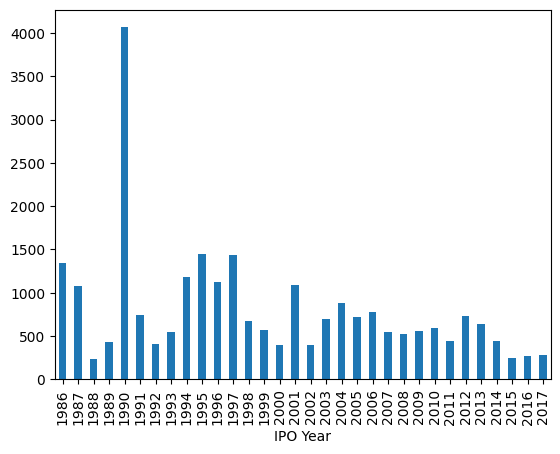

'\nGood job! After 1985, the year 1990 had the highest median market capitalization.\n'

In [24]:
# exercise 02

"""
Median market capitalization by IPO year

In the last lesson of the previous chapter, you created a timeline for the number of IPOs per year for technology companies.

Let's now analyze how market capitalization has evolved for different IPO years. You can combine data from all three exchanges to get a more comprehensive view.

pandas as pd and matplotlib.pyplot as plt have been imported, and the listings DataFrame from previous exercises which now includes an added reference column 'exchange' that contains the exchange for each listed company, is available in your workspace.
"""

# Instructions

"""

    
    Inspect and display listings using .info() and .head().
    
    Using broadcasting, create a new column market_cap_m for listings that contains the market cap in millions of USD.
    
    Select all companies with an 'IPO Year' after 1985.
    
    Drop all missing values in the 'IPO Year' column, and convert the remaining values to dtype integer.
    
    Group listings by 'IPO Year', select the market_cap_m column and calculate the median, sort with .sort_index(), and assign the result to ipo_by_year.
    
    Plot and show the results as a bar chart.

"""

# solution

# Inspect listings
listings.info()

# Show listings head
print(listings.head())

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Select companies with IPO after 1985
listings = listings[listings['IPO Year'] > 1985]

# Drop missing values and convert to integers
listings['IPO Year'] = listings['IPO Year'].dropna().astype(int)

# Calculate the median market cap by IPO Year and sort the index
ipo_by_year = listings.groupby('IPO Year').market_cap_m.median().sort_index()

# Plot results as a bar chart
ipo_by_year.plot(kind='bar')

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Good job! After 1985, the year 1990 had the highest median market capitalization.
"""

In [26]:
# exercise 03

"""
All summary statistics by sector

You can apply the various summary statistics that you have learned about in the last chapter to a groupby object to obtain the result on a per-category basis. This includes the .describe() function, which provides several insights all at once!

Here, you will practice this with the NASDAQ listings. pandas has been imported as pd, and the NASDAQ stock exchange listings data is available in your workspace in the nasdaq DataFrame.
"""

# Instructions

"""

    
    Inspect the nasdaq data using .info().
    
    Create a new column market_cap_m that contains the market cap in millions of USD. On the next line, drop the column 'Market Capitalization'.
    
    Group your nasdaq data by 'Sector' and assign to nasdaq_by_sector.
    
    Call the method .describe() on nasdaq_by_sector, assign to summary, and print the result.
    
    This works, but result is in long format and uses a pd.MultiIndex() that you saw earlier. Convert summary to wide format by calling .unstack().

"""

# solution

# Inspect NASDAQ data
nasdaq.info()

# Create market_cap_m
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

# Drop the Market Capitalization column
nasdaq.drop('Market Capitalization', axis=1, inplace=True)

# Group nasdaq by Sector
nasdaq_by_sector = nasdaq.groupby('Sector')

# Create summary statistics by sector
summary = nasdaq_by_sector.describe()

# Print the summary
print(summary)

# Unstack 
summary = summary.unstack()

# Print the summary again
print(summary)

#----------------------------------#

# Conclusion

"""
Nice work, now let's discover more ways of aggregating your data!
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   Market Capitalization  3167 non-null   float64
 4   IPO Year               1386 non-null   float64
 5   Sector                 2767 non-null   object 
 6   Industry               2767 non-null   object 
 7   Exchange               3167 non-null   object 
dtypes: float64(3), object(5)
memory usage: 198.1+ KB
                      Last Sale                                          \
                          count       mean         std     min      25%   
Sector                                                                    
Basic Industries           78.0  21.597679   29.009745  0.0336   2.6325   
Capital Goods       

"\nNice work, now let's discover more ways of aggregating your data!\n"

Sector            Exchange
Basic Industries  amex         137.318135
                  nasdaq       169.181116
                  nyse        1672.751912
Capital Goods     amex         107.390617
                  nasdaq       477.069539
Name: market_cap_m, dtype: float64


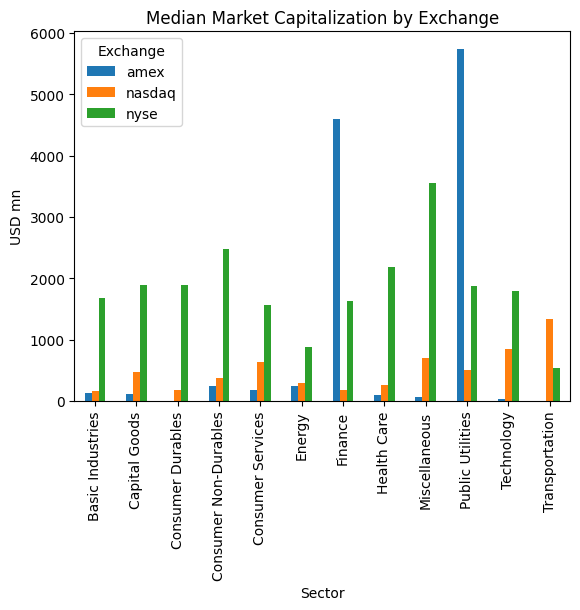

'\nAs you can see, the NYSE has the highest median market capitalization for each sector.\n'

In [27]:
# exercise 04

"""
Company value by exchange and sector

You can generate more fine-grained summaries of your data by providing a list of columns inside .groupby() and/or applying a statistical method such as .mean() directly to one or more numerical columns.

Here, you will calculate the median market capitalization for each sector, differentiated by the exchange that the companies are listed on. You will also use .unstack() to pivot the exchange labels from the rows into the columns. It's a good idea to inspect listings in your console before starting the exercise!

pandas as pd and matplotlib.pyplot as plt have been imported, and the listings DataFrame, with reference column 'Exchange' and a new column market_cap_m that contains the market cap in millions of USD, is available in your workspace.
"""

# Instructions

"""

    
    Group your data by both 'Sector' and 'Exchange', assigning the result to by_sector_exchange.
    
    Calculate the median market capitalization for by_sector_exchange and assign to mcap_by_sector_exchange.
    
    Display the first 5 rows of the result with .head().
    
    Call .unstack() on mcap_by_sector_exchange to move the Exchange labels to the columns, and assign to mcap_unstacked.
    
    Plot the result as a bar chart with the title 'Median Market Capitalization by Exchange' and ylabel set to 'USD mn',
    Show the result.

"""

# solution

# Group listings by Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Calculate the median market cap
mcap_by_sector_exchange = by_sector_exchange.market_cap_m.median()

# Display the head of the result
print(mcap_by_sector_exchange.head())

# Unstack mcap_by_sector_exchange
mcap_unstacked = mcap_by_sector_exchange.unstack()

# Plot as a bar chart
mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange')

# Set the y label
plt.ylabel('USD mn')

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
As you can see, the NYSE has the highest median market capitalization for each sector.
"""

In [28]:
# exercise 05

"""
Calculate several metrics by sector and exchange

The .agg() function allows you to aggregate your data in even more ways. Providing a list of names of statistical methods calculates more than one summary statistic at once. You can provide new names for the aggregated columns using the rename method, which takes a dictionary argument where the keys are the names of the metrics you computes and the values are your desired new names.

In this exercise, you will calculate the mean, median, and standard deviation of market capitalizations in millions of USD. pandas as pd and matplotlib.pyplot as plt have been imported, and the listings DataFrame, with reference column 'Exchange' is available in your workspace.
"""

# Instructions

"""

    
    With broadcasting and .div(), create a new column 'market_cap_m' that contains the market capitalization data in millions of USD.
    
    Group your data by both 'Sector' and 'Exchange', assigning the result to by_sector_exchange.
    
    Assign the market_cap_m column of by_sector_exchange to a variable bse_mcm.
    
    Use .agg() to calculate the mean, median, and standard deviation for market_cap_m, and call the rename method with a dictionary argument for the keyword parameter columns storing the results in 'Average', 'Median', and 'Standard Deviation', respectively, and assign to summary.
    
    Print the result to your console.

"""

# solution

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Group listing by both Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Subset market_cap_m of by_sector_exchange
bse_mcm = by_sector_exchange['market_cap_m']

# Calculate mean, median, and std in summary
summary = bse_mcm.agg(['mean', 'median', 'std']).rename(columns={'mean': 'Average', 'median': 'Median', 'std':'Standard Deviation'})

# Print the summary
print(summary)

#----------------------------------#

# Conclusion

"""
Great! You can now easily find the mean, median, and standard deviation for the market capitalization in any sector and exchange.
"""

                                     Average       Median  Standard Deviation
Sector                Exchange                                               
Basic Industries      amex        374.323921   137.318135          709.618981
                      nasdaq      824.788760   169.181116         1937.492260
                      nyse       4192.727667  1672.751912         9126.659431
Capital Goods         amex        148.943096   107.390617           95.611487
                      nasdaq     2031.734096   477.069539         6593.280268
                      nyse       5746.444596  1898.473017         8272.670181
Consumer Durables     nasdaq     1045.413873   178.278939         2493.971323
                      nyse       2926.061359  1888.834676         3083.301891
Consumer Non-Durables amex        237.644444   237.644444                 NaN
                      nasdaq     1258.570987   367.018066         1844.221028
                      nyse       6473.559842  2479.639848       

'\nGreat! You can now easily find the mean, median, and standard deviation for the market capitalization in any sector and exchange.\n'

/tmp/ipykernel_102679/2760771438.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['IPO Year'] = listings['IPO Year'].astype(int)


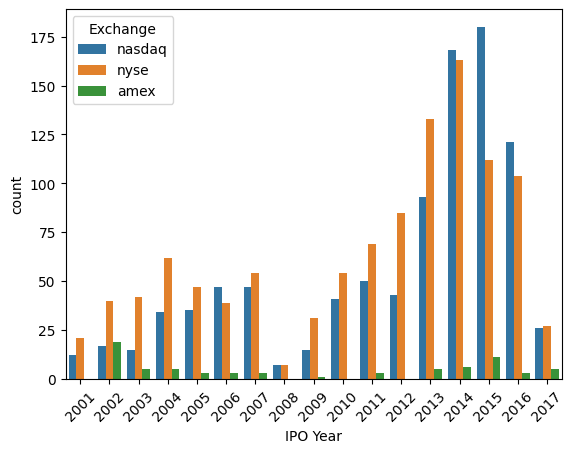

'\nOther than a few outliers, the number of companies that go public, regardless of exchange, seems to increase each year.\n'

In [29]:
# exercise 06

"""
Plot IPO timeline for all exchanges using countplot()

To create a basic visualization of the number of observations per category in a dataset, the seaborn countplot() function is usually the way to go:

seaborn.countplot(x=None, hue=None, data=None, ...)

The x parameter contains the names of the variables in the data argument, which is the DataFrame to be plotted. hue identifies an additional categorical variable with color. These are three optional parameters out of many accepted by the function; for a full list, check out the seaborn documentation.

Let's use this tool to compare the timeline of IPO activity across the three exchanges. pandas as pd, matplotlib.pyplot as plt, and seaborn as sns have been imported, and the listings DataFrame with reference column 'Exchange' is available in your workspace.
"""

# Instructions

"""

    Filter listings to only include IPO years after the year 2000.
    Convert the data in the column 'IPO Year' to integers.
    Plot a sns.countplot() of listings using 'IPO Year' as the x variable and 'Exchange' for hue.
    Rotate the xticks() by 45 degrees and show the result.

"""
import seaborn as sns
# solution

# Select IPOs after 2000
listings = listings[listings['IPO Year'] > 2000]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create a countplot
sns.countplot(x='IPO Year', hue='Exchange', data=listings)

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Other than a few outliers, the number of companies that go public, regardless of exchange, seems to increase each year.
"""

In [30]:
import numpy as np
income_trend = pd.read_csv(path_data+'income_trend.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            2959 non-null   object 
 1   Year               2959 non-null   int64  
 2   Income per Capita  2959 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 69.5+ KB


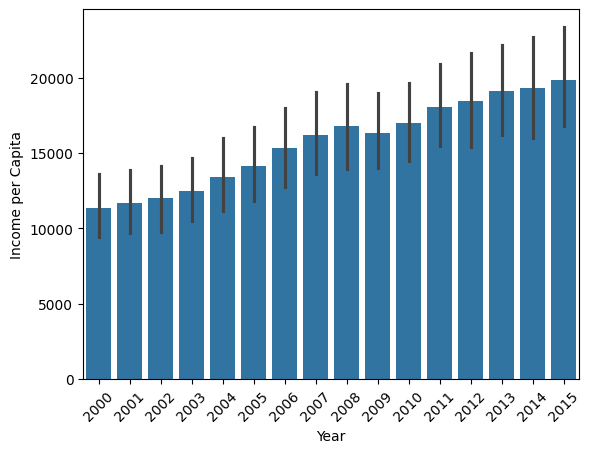

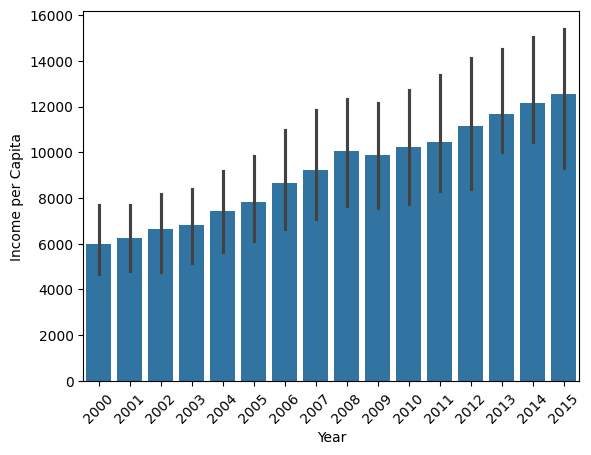

"\nGreat work! Notice how you didn't have to specify an estimator in the first barplot.\n"

In [31]:
# exercise 07

"""
Global median per capita income over time

The seaborn barplot() function shows point estimates and confidence intervals as rectangular bars; the default function displays the mean, but it can also represent another summary statistic if you pass a particular numpy function to its estimator parameter:

seaborn.barplot(x=None, y=None, data=None, estimator=<function mean>, ...)

In this exercise, you will use an imported World Bank dataset containing global income per capita data for 189 countries since the year 2000. To practice displaying summary statistics per category, you will plot and compare the median global income per capita since 2000 to the mean.

pandas as pd, numpy as np, matplotlib.pyplot as plt, and seaborn as sns have been imported. The global income data is available in your workspace in income_trend.
"""

# Instructions

"""

    
    Inspect income_trend using .info().
    
    Create a sns.barplot() using the column 'Year' for x and 'Income per Capita' for y, and show the result after rotating the xticks by 45 degrees.
    
    Use plt.close() after the initial plt.show() to be able to show a second plot.
    
    Create a second sns.barplot() with the same x and y settings, using estimator=np.median to calculate the median, and show the result.


"""

# solution

# Inspect the data
income_trend.info()

# Create barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create second barplot
sns.barplot(x="Year", y='Income per Capita', data=income_trend, estimator=np.median)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Great work! Notice how you didn't have to specify an estimator in the first barplot.
"""

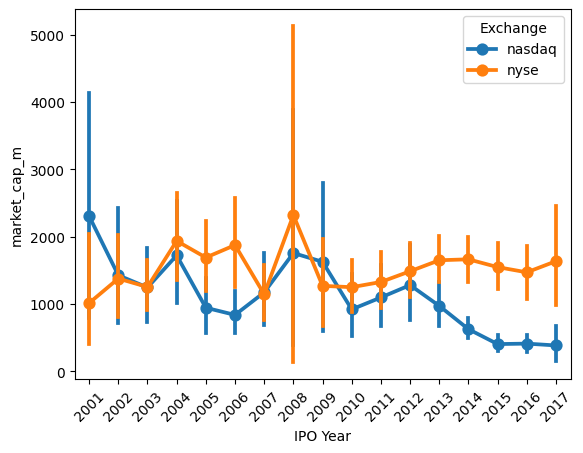

'\nNice work! You can easily distinguish the market capitalizations of each exchange by color.\n'

In [32]:
# exercise 08

"""
Calculate several metrics by sector and IPO year

The seaborn pointplot() function facilitates the comparison of summary statistics of a numerical variable for different levels of categorical variables:

seaborn.pointplot(x=None, y=None, hue=None, data=None, ...)

In the video, you saw a visualization for the market capitalization (the numerical variable) differentiated by whether the IPO (the categorical variable) occurred before (first level) or after (second level) the year 2000.

In this exercise, you will compare the mean market capitalization for each year since 2000 for the NYSE and the NASDAQ, after excluding outliers beyond the 95th percentile. pandas as pd and matplotlib.pyplot as plt have been imported, and the listings DataFrame with reference column 'Exchange' is available in your workspace.
"""

# Instructions

"""

    
    Import seaborn as sns.
    
    Filter listings to have companies with IPOs after 2000 from all exchanges except the 'amex'.
    
    Convert the data in column 'IPO Year' to integers.
    
    Create the column market_cap_m to express market cap in USD million.
    
    Filter market_cap_m to exclude values above the 95th percentile.
    
    Create a pointplot of listings using the column 'IPO Year' for x, 'market_cap_m' for y, and 'Exchange' for hue. Show the result after rotating the xticks by 45 degrees.

"""

# solution

# Import the seaborn library as sns
import seaborn as sns

# Exclude IPOs before 2000 and from the 'amex'
listings = listings[(listings['IPO Year'] > 2000) & (listings.Exchange != 'amex')]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Exclude outliers
listings = listings[listings.market_cap_m < listings.market_cap_m.quantile(.95)]

# Create the pointplot
sns.pointplot(x="IPO Year", y='market_cap_m', hue='Exchange', data=listings)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Nice work! You can easily distinguish the market capitalizations of each exchange by color.
"""

In [33]:
inflation = pd.read_csv(path_data+'inflation.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    189 non-null    object 
 1   Inflation  162 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


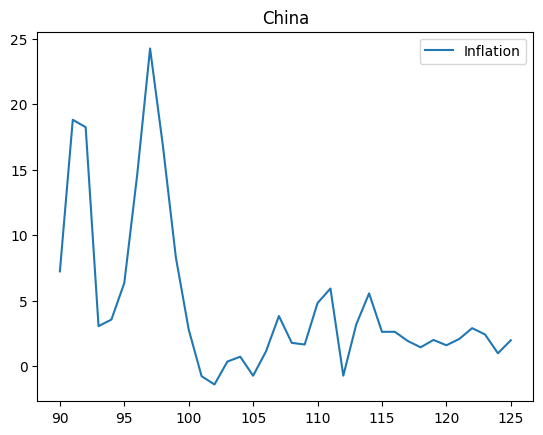

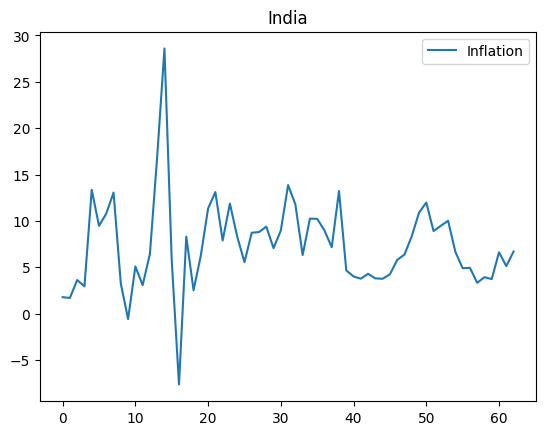

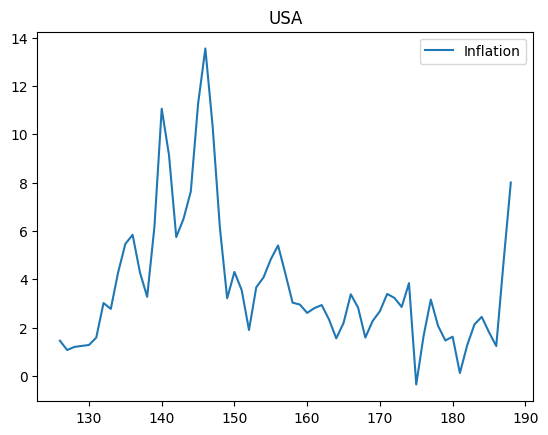

'\nNice job! As you can see, the inflation trends for each country vary significantly.\n'

In [34]:
# exercise 09

"""
Inflation trends in China, India, and the US

Finally, the seaborn package includes functions that allow you to visualize the distribution of levels of categorical variables.

In the next two exercises, you will examine the historical inflation data in China, India, and the US over the past 50+ years in data from FRED. Before jumping into using the functions you have just learned, you should first familiarize yourself with the raw data. pandas as pd, matplotlib.pyplot as plt, and seaborn as sns have been imported for you. The FRED inflation data is in your workspace as inflation.
"""

# Instructions

"""

    
    Inspect inflation using .info().
    
    Group inflation by 'Country' and assign to inflation_by_country.
    
    In a for loop, iterate over country, data pairs returned by inflation_by_country. In each iteration, use .plot() on data with title set to country to show the historical time series.

"""

# solution

# Inspect the inflation data
inflation.info()

# Create inflation_by_country
inflation_by_country = inflation.groupby('Country')

# Iterate over inflation_by_country and plot the inflation time series per country
for country, data in inflation_by_country:
    # Plot the data
    data.plot(title=country)
    # Show the plot
    plt.show()

#----------------------------------#

# Conclusion

"""
Nice job! As you can see, the inflation trends for each country vary significantly.
"""

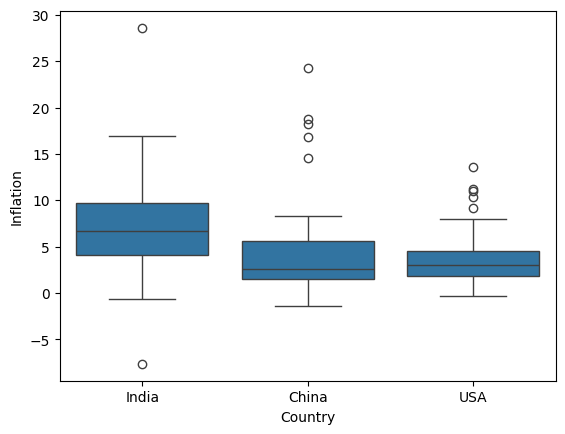

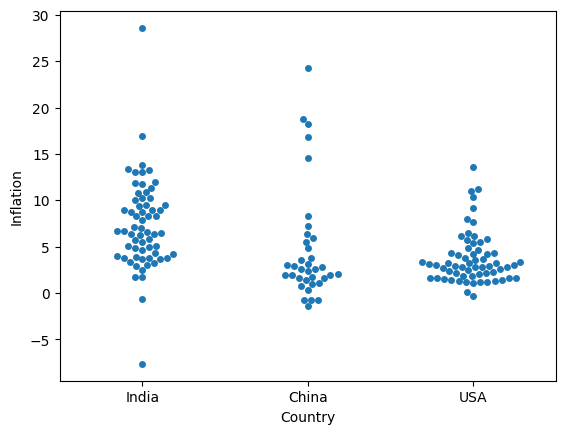

"\nAwesome job. You've finished the last exercise!\n"

In [35]:
# exercise 10

"""
Distribution of inflation rates in China, India, and the US

As you saw in the video, the boxplot() function displays key quantiles of a distribution with respect to categories, where y represents a quantitative variable, and x a categorical variable. In statistics, this kind of distribution is known as a box-and-whisker plot.

A complement to a box plot is a swarmplot(), which draws a categorical scatterplot that displays all categorical observations without overlapping; it takes similar arguments to boxplot():

seaborn.boxplot(x=None, y=None, data=None, ...)
seaborn.swarmplot(x=None, y=None, data=None, ...)

In this final exercise, you will compare the historical distributions of inflation rates by country - specifically China, India, and the US - instead of by time series trends. pandas as pd, matplotlib.pyplot as plt, and seaborn as sns have been imported for you. The FRED inflation data is in your workspace as inflation.
"""

# Instructions

"""

    Create and show a boxplot of the inflation data with 'Country' for x and 'Inflation' for y.
    
    Create and show sns.swarmplot() with the same arguments.

"""

# solution

# Create boxplot
sns.boxplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create swarmplot
sns.swarmplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Awesome job. You've finished the last exercise!
"""